In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/COLAB/NN2/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
X = np.array(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']])
y = np.array(df['median_house_value'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
from keras.models import Sequential
model = Sequential()

In [8]:
from keras.layers import Dense
model.add(Dense(8, input_shape = (8,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [9]:
model.compile(optimizer='rmsprop', loss='mse', metrics =['mse'])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
model.fit(X_train, y_train, epochs = 50, batch_size=10)

Epoch 1/50
1652/1652 [==============================] - 4s 2ms/step - loss: 34226923520.0000 - mse: 34226923520.0000
Epoch 2/50
1652/1652 [==============================] - 3s 2ms/step - loss: 25898483712.0000 - mse: 25898483712.0000
Epoch 3/50
1652/1652 [==============================] - 3s 2ms/step - loss: 24464007168.0000 - mse: 24464007168.0000
Epoch 4/50
1652/1652 [==============================] - 4s 2ms/step - loss: 22681556992.0000 - mse: 22681556992.0000
Epoch 5/50
1652/1652 [==============================] - 4s 3ms/step - loss: 20151052288.0000 - mse: 20151052288.0000
Epoch 6/50
1652/1652 [==============================] - 3s 2ms/step - loss: 16437028864.0000 - mse: 16437028864.0000
Epoch 7/50
1652/1652 [==============================] - 3s 2ms/step - loss: 12583859200.0000 - mse: 12583859200.0000
Epoch 8/50
1652/1652 [==============================] - 3s 2ms/step - loss: 11451884544.0000 - mse: 11451884544.0000
Epoch 9/50
1652/1652 [==============================] - 3s 2ms/s

In [12]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

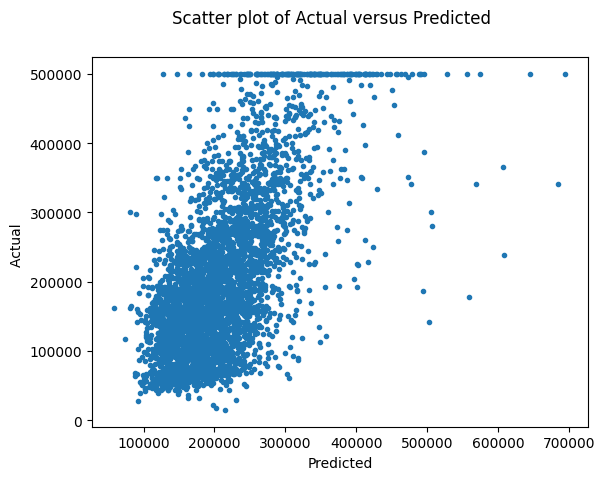

In [13]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted')
plt.scatter(x=y_pred, y=y_test, marker='.')
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.show()